In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from src import support as sp



#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df_full = pd.read_csv('../Files/full_data_clean.csv')
df_flight = pd.read_csv('../Files/flight_clean.csv')
df_loyalty = pd.read_csv('../Files/loyalty_clean.csv')


In [3]:
numerics = df_full.select_dtypes(exclude = ['O','category']).columns
categorics = df_full.select_dtypes(exclude = 'number').columns

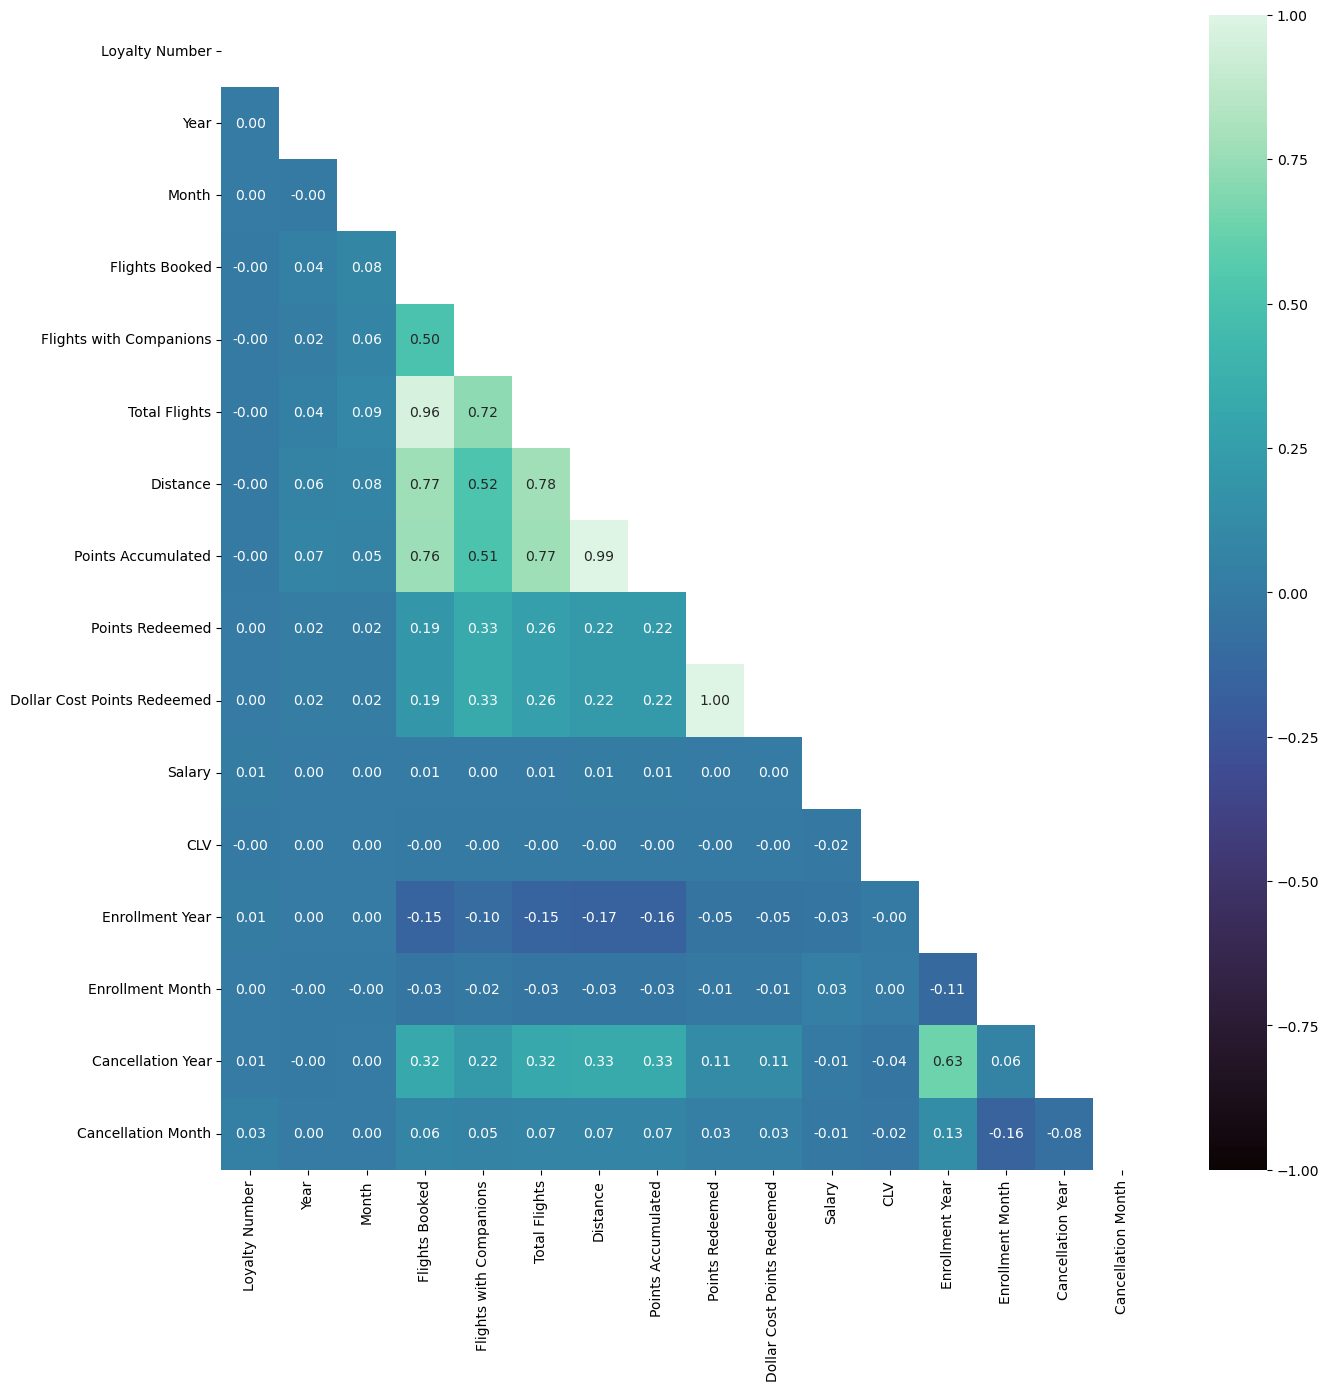

In [4]:
df_corr = df_full[numerics].corr(method = 'pearson')

plt.figure(figsize = (15, 15))

mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 


Text(0.5, 1.0, 'Enrollment Year & Cancellation Year')

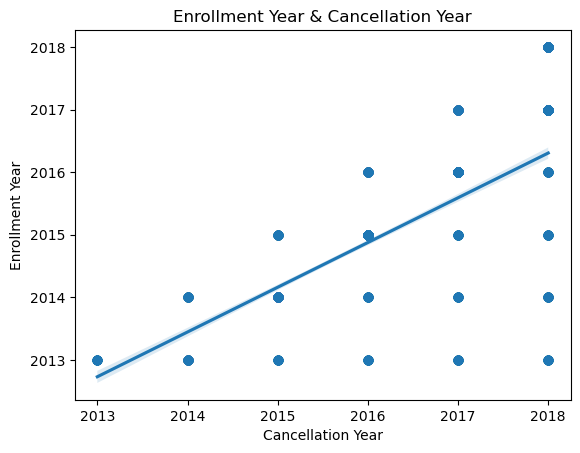

In [5]:
sns.regplot(data=df_loyalty, y='Enrollment Year', x='Cancellation Year')
plt.title('Enrollment Year & Cancellation Year')


KeyboardInterrupt: 

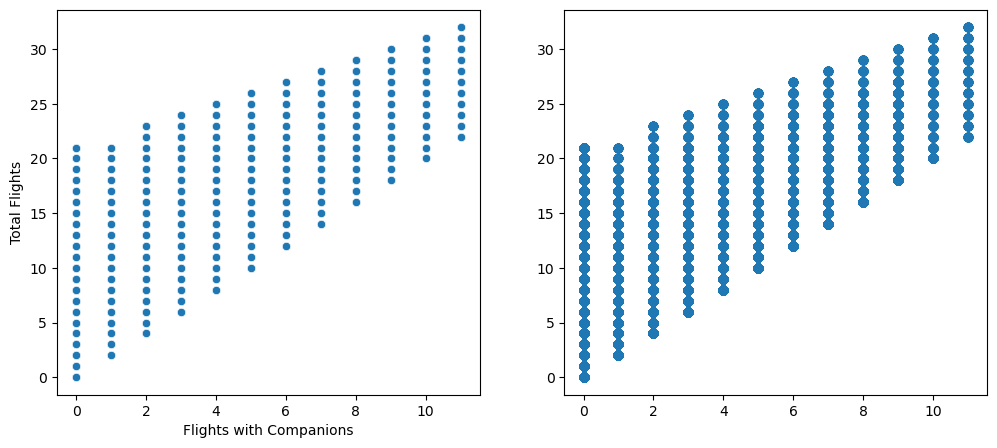

In [7]:
sp.num_and_num (df_full,'Flights with Companions', 'Total Flights')

In [ ]:
# CORRELATION MONTHLY FLIGHTS AND BOOKINGS
# Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?



In [ ]:
#sns.pairplot( data=df_loyalty)

'\nIt is notable the consistency on the amoutn of monthly flights on both years. \nIt is also understandable the increase on flights on 2018 compared to previous year'

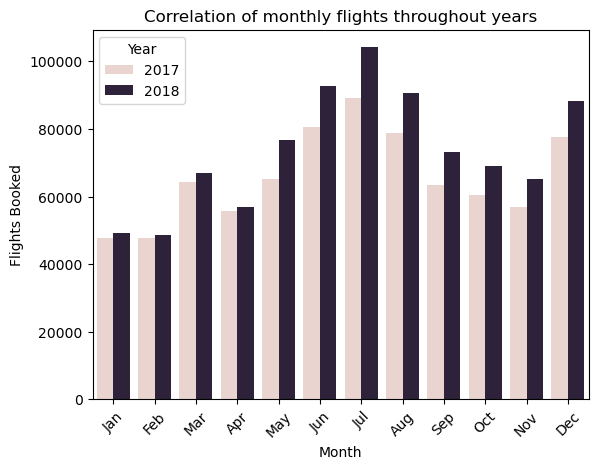

In [21]:
df_m_y = df_full.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index() # GROUP BY MONTH AND YEAR, THAN ADD BOOKED

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_m_y['Month'] = df_m_y['Month'].apply(lambda x: month_names[x - 1]) # REPLACING NUMBERS ON RANGE FOR MONTHS, PROVIDED LIST AND INDEX TO REPLACE

sns.barplot(data=df_m_y, x='Month', y='Flights Booked', hue='Year')
plt.xticks(rotation=45) # ROTATION TO NOT OVERLAY
plt.title('Correlation of monthly flights throughout years')

"""
It is notable the consistency on the amoutn of monthly flights on both years. 
It is also understandable the increase on flights on 2018 compared to previous year"""

''

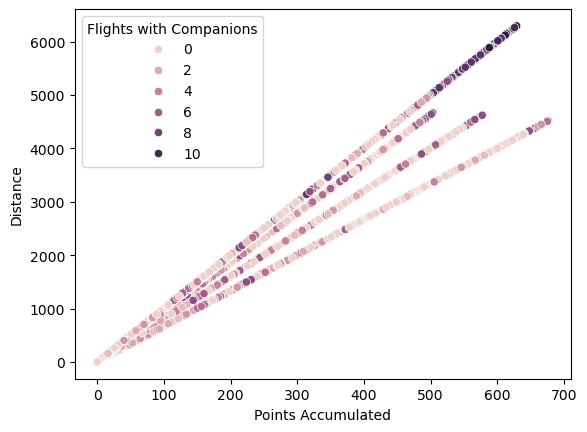

In [ ]:
# CORRELATION DISTANCY AND ACCUMULATED POINTS

sns.scatterplot(data=df_full, y='Distance', x='Points Accumulated', hue='Flights with Companions' )

"""
There is a clear positive correlation between these variables, as both increase simultaneously. 
It can be stated that for every 1,000 units of distance, there is an increase of 100 points, which represents an average of 10%.

The heatmap highlights this correlation, and the graph also shows data for flights with companions.
Another interesting insight is that flights with companions are often associated with longer distances.
"""

In [27]:
df_c_p

,Province,Loyalty Number
0,Alberta,969
1,British Columbia,4409
2,Manitoba,658
3,New Brunswick,636
4,Newfoundland,258
5,Nova Scotia,518
6,Ontario,5404
7,Prince Edward Island,66
8,Quebec,3300
9,Saskatchewan,409


'The grafic represents that '

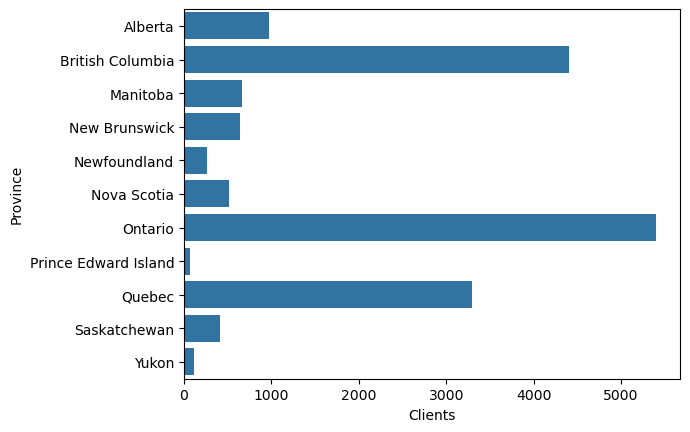

In [ ]:
# CORRETATION OF CLIENTS BY PROVINCES
df_c_p = df_full.groupby('Province')['Loyalty Number'].nunique().reset_index() 
sns.barplot(data=df_c_p, y='Province', x='Loyalty Number')
plt.xlabel('Clients')


"""The grafic represents that Ontario, British Colombia and Quebec are the ones with more clients.
Relation that is expected considering they are the most populated provinces(external source)"""